Vamos usar um pouco de finanças quantitativas para entender se o longo prazo faz algum sentindo.
Para isso vou usar o índice Ibovespa já que ele é o Benchmark em renda variável. (Isso não significa que ele seja um bom indíce, rs)

Origem dos Dados: Yahoo Finance

Etapas:

1. Recuperar preço histórico do ibovespa (^BVSP) iniciando a partir 1995. (Primeiro ano após ínicio do plano real)
2. Criar janelas em diferentes periodos
3. Plotar os dados
4. Avaliar os resultados


# 1. Preço histórico

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings('ignore')
#######################

# recuperar o preço historico. Neste caso vamos usar somente o preço de fechamento ajustado (Adj Close).
inicio_janela = '1995-01-01'
fim_janela = date.today()
df_hist_ibov = yf.download(tickers='^BVSP', start=inicio_janela, end=fim_janela) ['Adj Close']


[*********************100%***********************]  1 of 1 completed


In [2]:
# Costumo trabalhar com uma copia do dataframe para evitar ficar fazendo novas requisições
copia_df_hist_ibov = df_hist_ibov.copy()

In [3]:
copia_df_hist_ibov.head()

Date
1995-01-02    4301.000000
1995-01-03    4098.000000
1995-01-04    3967.899902
1995-01-05    4036.699951
1995-01-06    3827.399902
Name: Adj Close, dtype: float64

In [4]:
copia_df_hist_ibov.tail()

Date
2022-02-24    111592.0
2022-02-25    113142.0
2022-03-02    115174.0
2022-03-03    115166.0
2022-03-04    114474.0
Name: Adj Close, dtype: float64

# 2. Vamos criar um função que vai nos retornar historicos em janelas de tempo diferentes (No caso períodos anuais)

In [84]:
def janela_em_anos(df_historico, inicio_janela, fim_janela):
    # Vamos criar um dataframe filtrando pelo inicio e fim da janela
    # Pegar os retornos diarios e normalizar iniciando em 100
    # Retornar um df agrupando os dados por ano
    df_filtrado = df_historico[(df_historico.index.year >= inicio_janela) & (df_historico.index.year <= fim_janela)]
    retorno = df_filtrado.pct_change()
    retorno_acum_norm = ((1 + retorno).cumprod()) * 100
    df_agrupado = retorno_acum_norm.groupby(retorno_acum_norm.index.year).last().unique()
    return df_agrupado

In [85]:
# Podemos ver que nossa função esta retornando uma janela definida
janela_em_anos(copia_df_hist_ibov, 1995, 2022)

array([  99.95349919,  163.68053714,  237.08439898,  157.73076029,
        397.39595443,  354.77795861,  315.69402465,  261.98558475,
        516.99604743,  609.06765868,  777.86561265, 1034.03859568,
       1485.37549407,  873.05277842, 1594.69890723, 1611.36944897,
       1319.55359219, 1417.15880028, 1197.55870728, 1162.68309695,
       1007.90513834, 1400.30225529, 1776.37758661, 2043.40850965,
       2696.21018368, 2773.91304348, 2437.1541502 , 2661.56707742])

In [80]:
# Blz, agora que temos nossa função vamos criar uma lista com varias janelas diferentes
# Exemplo 1995 - 2022 = 28A
#         1996 - 2022 = 27A
#         1997 - 2022 = 26A
#              .
#              .
#              .
#         2022 - 2022 = 1A

# Primeiro vamos definir nossa lista de anos
years = []
for year in range(int(pd.to_datetime(inicio_janela).strftime('%Y')), int(fim_janela.strftime('%Y')) + 1):
    years.append(year)

In [81]:
print(years)

[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [70]:
# Blz, agora vamos criar uma lista com diferentes janelas
historico_em_janelas = []
for year in years:
    historico_em_janelas.append(janela_em_anos(copia_df_hist_ibov, year, int(fim_janela.strftime('%Y'))))


In [82]:
# Fechou, agora vamos criar um dataframe com todos os periodos
periodos = []
for periodo in range(1, len(years) +1):
    periodos.append(f'{periodo}A')

dataframe_processado = pd.DataFrame(data=historico_em_janelas, index=years, columns=periodos)
dataframe_processado

,1A,2A,3A,4A,5A,6A,7A,8A,9A,10A,...,19A,20A,21A,22A,23A,24A,25A,26A,27A,28A
1995,99.953499,163.680537,237.084399,157.730760,397.395954,354.777959,315.694025,261.985585,516.996047,609.067659,...,1197.558707,1162.683097,1007.905138,1400.302255,1776.377587,2043.408510,2696.210184,2773.913043,2437.154150,2661.567077
1996,160.358528,232.272608,154.529506,389.330531,347.577496,309.286798,256.668407,506.503257,596.706212,762.078296,...,1139.085645,987.449011,1371.882159,1740.324783,2001.936130,2641.488746,2717.614572,2387.690432,2607.548745,NaN
1997,146.603407,97.534325,245.733592,219.380346,195.212422,162.001294,319.689454,376.622816,481.000647,639.407663,...,623.247790,865.890303,1098.440083,1263.561211,1667.227374,1715.275681,1507.037596,1645.805478,NaN,NaN
1998,64.732824,163.091603,145.601145,129.561069,107.519084,212.175573,249.961832,319.236641,424.370229,609.599237,...,574.685115,729.026718,838.616412,1106.526718,1138.416031,1000.209924,1092.309160,NaN,NaN,NaN
1999,246.211466,219.806972,195.592048,162.316335,320.311150,377.355229,481.936041,640.651109,920.282339,540.910400,...,1100.576203,1266.018438,1670.469605,1718.611351,1509.968309,1649.006050,NaN,NaN,NaN,NaN
2000,90.129947,80.200827,66.556409,131.340815,154.731246,197.613703,262.693444,377.353810,221.795629,405.126994,...,519.119905,684.961607,704.701713,619.149439,676.160662,NaN,NaN,NaN,NaN,NaN
2001,88.025932,73.050243,144.155592,169.828201,216.894652,288.324149,414.171799,243.435981,444.654781,449.303079,...,751.792545,773.458671,679.559157,742.132901,NaN,NaN,NaN,NaN,NaN,NaN
2002,81.228374,160.294118,188.840830,241.176471,320.602653,460.539216,270.689158,494.434833,499.603518,409.126298,...,860.049020,755.637255,825.216263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,191.640093,225.769198,288.339223,383.297423,550.598983,323.623201,591.122985,597.302422,489.132121,525.312419,...,903.404292,986.589675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,116.711963,149.057697,198.146581,284.633549,167.297839,305.582535,308.777010,252.858098,271.561595,229.480953,...,510.020049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Plotando nosso Dataframe

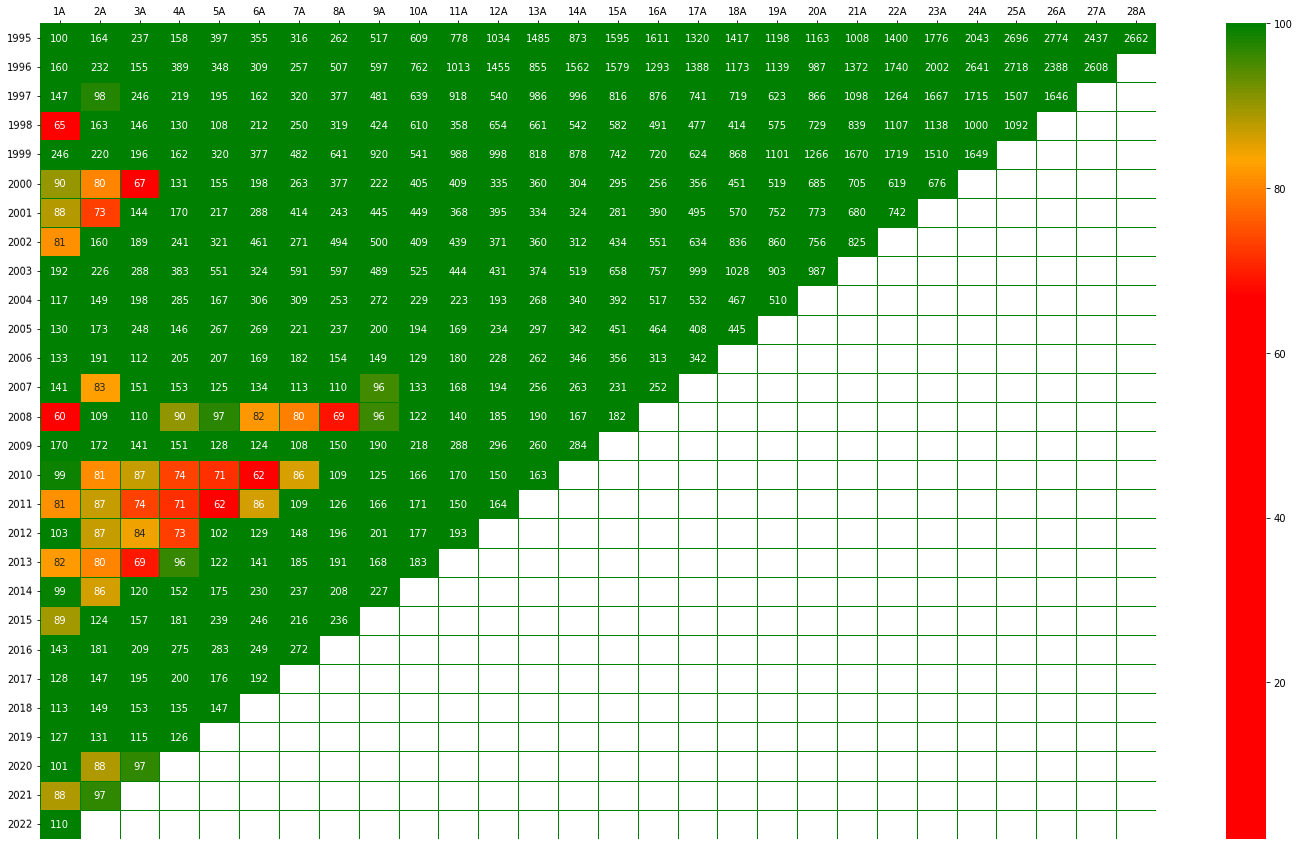

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig = plt.subplots(figsize=(25,15))
cmap = LinearSegmentedColormap.from_list(
       name='Historico',
       colors=['red','red','red','red','red','orange','green'])

ax = sns.heatmap(dataframe_processado, cmap=cmap, annot=True, vmin=1, vmax=100, fmt='.0f', cbar_kws=None, linewidths=1, linecolor='g')
ax.tick_params(axis='y', rotation=1)
ax.xaxis.set_ticks_position('top')

plt.show()

# 4. Tirando algumas conclusões.

Obs: A leitura é realizada no eixo horizontal mesmo.

Ex.
1Ano 1995 (100) - 28 Anos (2662)
1Ano 1996 (160) - 27 Anos (2608)
               .
               .
               .
Não esqueça que o período sempre finaliza no momento que escrevo mar/2022.


Podemos identificar que investimentos com mais de 10 anos não estão no vermelho. O que pode ser um bom sinal para quem pensa no longo
prazo.


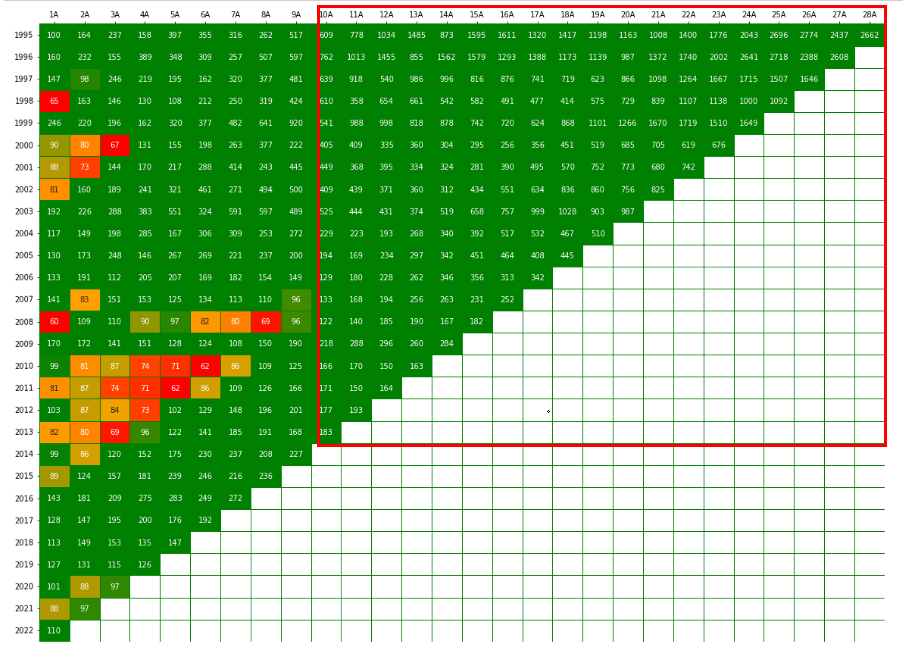

In [89]:
from IPython.display import Image

Image(filename='10Anos.png')

As caixas em azul indicam um período onde o ibovespa segue reta acima. Mais abaixo tem um gráfico comparando ibov X taxa de juros do país.
Note que justamente nestas faixas os movimentos são inversos.

Além é claro que estes perídos incrivelmente cravam 4 anos.

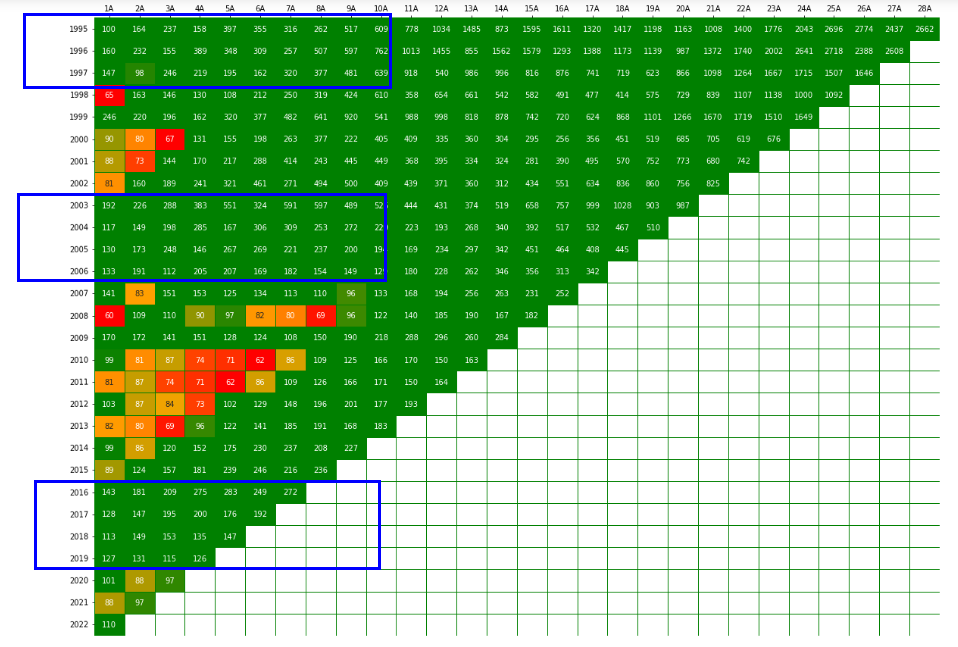

In [90]:
Image(filename='Padroes.PNG')

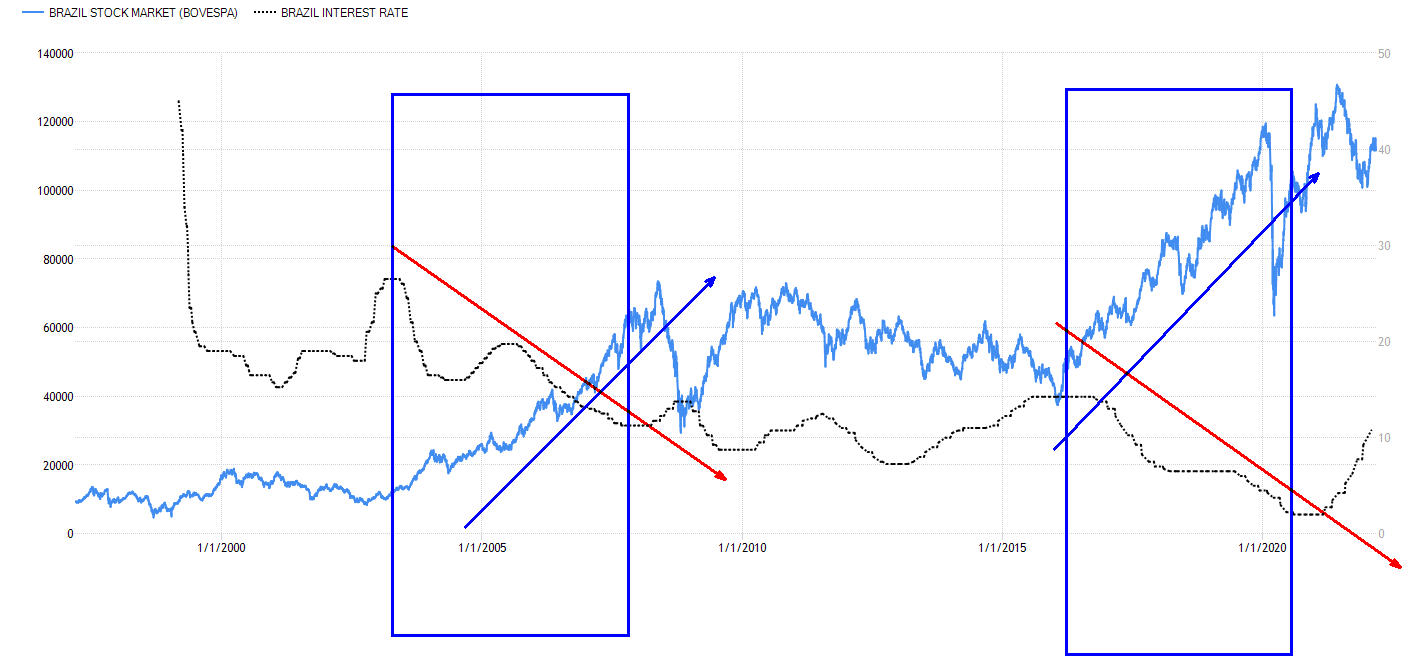

In [91]:
Image(filename='ibovXtaxajuros.PNG')

Não estou indicando nenhum tipo de investimento. Este notebook tem objetivo único (Estimular seu cérebro, rs.)
Alias estou repassando o estímulo para frente, pois os créditos de uma primeira abordagem vai para o canal -> Código Quant.